In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
df = pd.read_csv("C:/Users/moham/Downloads/archive/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Understanding the Dataset

In [3]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [8]:
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


<Axes: >

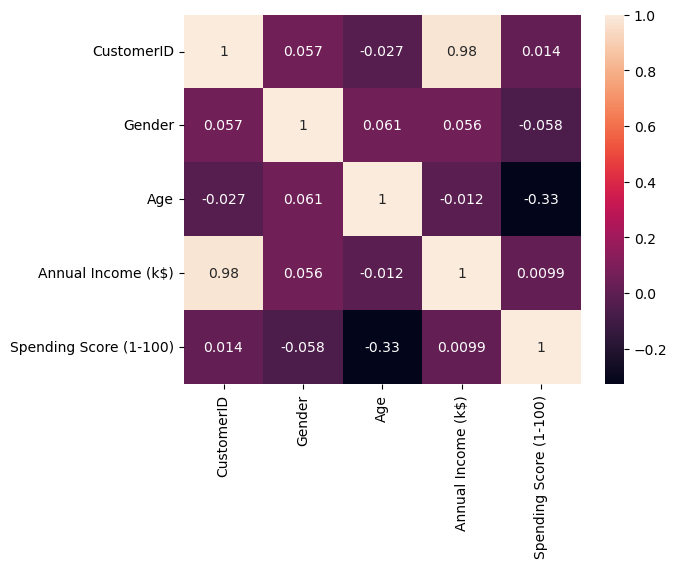

In [10]:
sns.heatmap(df.corr(), annot=True)

## Model Building

In [11]:
features = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980


In [14]:
from sklearn.cluster import KMeans
error = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(X_scaled)
    error.append(kmeans.inertia_)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [15]:
error

[800.0,
 588.8026767824936,
 476.7875544135159,
 386.7147857740688,
 325.62835033072906,
 276.02002723874256,
 239.6292639241128,
 199.78478208926083,
 174.12493921599278,
 152.0867629871069]

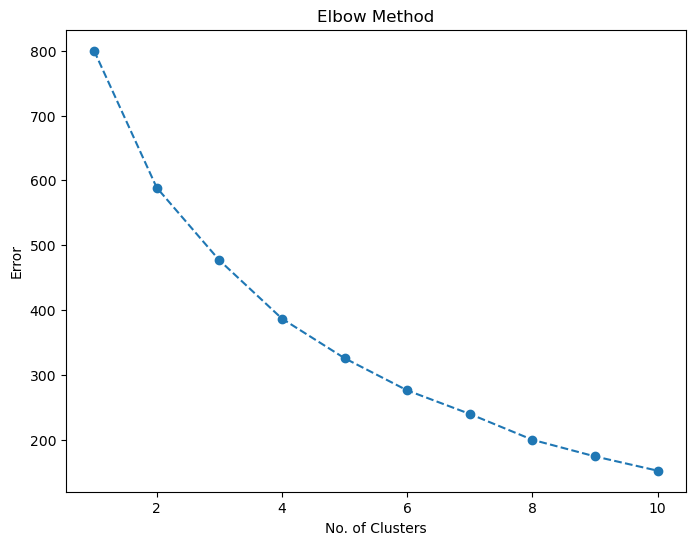

In [16]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), error, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("Error")
plt.show()

In [17]:
km_model = KMeans(n_clusters=8, init='k-means++', random_state=10)

In [18]:
km_model.fit(X_scaled)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(random_state=10)

In [19]:
pred = km_model.predict(X_scaled)
pred

array([1, 1, 2, 2, 2, 2, 3, 2, 6, 2, 6, 2, 3, 2, 1, 1, 2, 1, 6, 2, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 2, 6, 2, 6, 1, 3, 2, 3, 2, 3, 2, 3, 1, 6, 2,
       3, 2, 3, 2, 2, 2, 3, 1, 2, 6, 3, 6, 3, 6, 2, 6, 6, 1, 3, 3, 6, 1,
       3, 3, 1, 2, 6, 3, 3, 3, 6, 1, 3, 1, 2, 3, 6, 1, 6, 3, 2, 6, 3, 2,
       2, 3, 3, 1, 6, 3, 2, 1, 3, 2, 6, 1, 2, 3, 6, 1, 6, 2, 3, 6, 6, 6,
       6, 2, 0, 1, 2, 2, 3, 3, 3, 3, 1, 0, 5, 7, 0, 5, 4, 7, 6, 7, 4, 7,
       0, 5, 4, 5, 0, 7, 4, 5, 0, 7, 0, 5, 4, 7, 4, 5, 0, 7, 4, 7, 0, 5,
       0, 5, 4, 5, 4, 5, 0, 5, 4, 5, 4, 5, 4, 5, 0, 7, 4, 7, 4, 7, 0, 5,
       4, 7, 4, 7, 0, 5, 4, 5, 0, 7, 0, 7, 0, 5, 0, 5, 4, 5, 0, 5, 0, 7,
       4, 7])

In [20]:
df['Cluster'] = pred
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,2
3,4,0,23,16,77,2
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,5
196,197,0,45,126,28,0
197,198,1,32,126,74,7
198,199,1,32,137,18,4
